In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import networkx as nx
import math
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [2]:
"""
collatz.py is a helper file that contains the following functions that build back-bone of our analysis.
"""
from collatz import collatz, collatzpath, collatzpath_to_dictionary, place, graph_unit_place, graph_for_numbers

Collatz is a function that takes a number as an argument and gives number of steps the number needs to reach 1 when collatz conjecture logic is applied.

Below, we create graph by extracting unit's value of the numbers in the path.
*graph_unit_place * function takes the starting and ending number for the range we are calculating path for and gives the number of times a path was traversed along with what the path is.

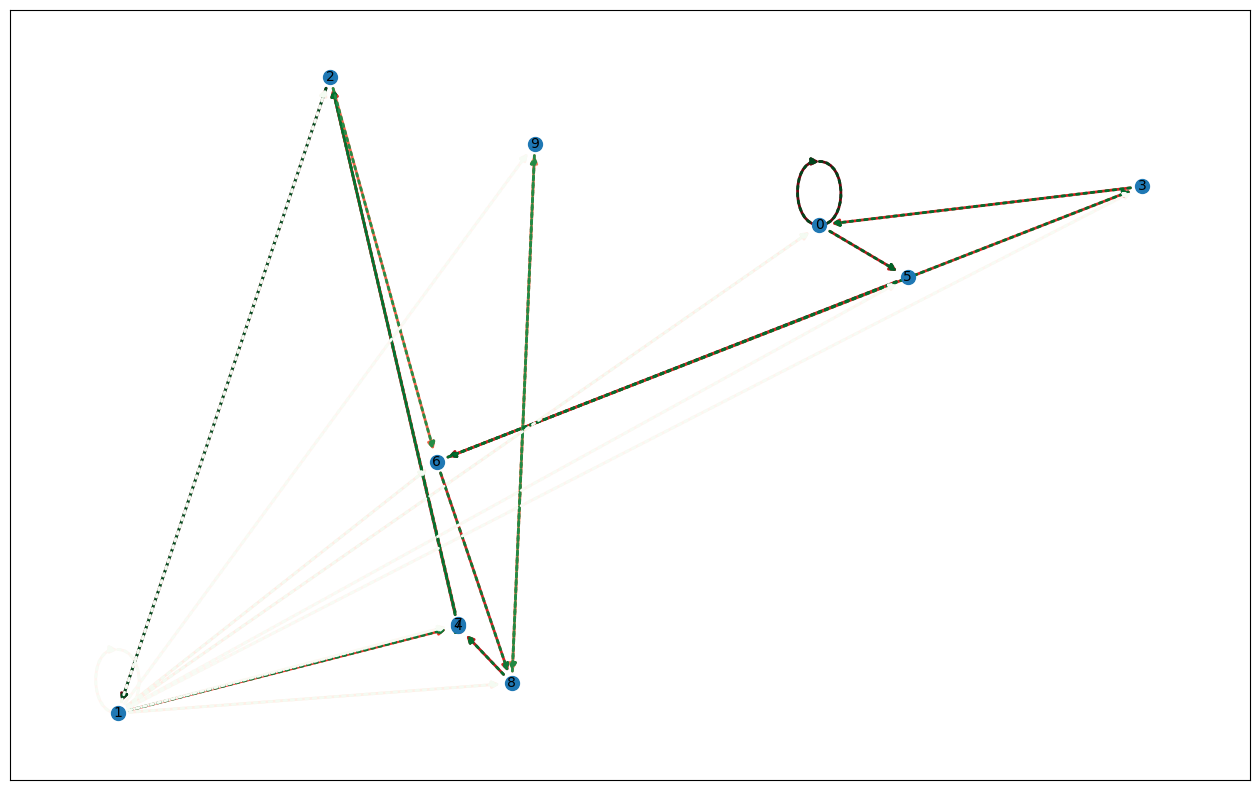

In [4]:
NG = nx.MultiDiGraph()
#nodes = [i for i in range(10)]
#print(nodes)
#WG.add_nodes_from(nodes, with_labels=True)

NG.add_weighted_edges_from(graph_unit_place(2,100))
NG.add_weighted_edges_from(graph_unit_place(100,2000))


elist1 = [(u, v) for (u, v, d) in graph_unit_place(2,100)]
elist2 = [(u, v) for (u, v, d) in graph_unit_place(100,2000)]

d1 = [d for (u, v, d) in graph_unit_place(2,100)]
d2  = [d for (u, v, d) in graph_unit_place(100,2000)]

#e1=dict(zip(elist1,d1))
#e2=dict(zip(elist2,d2))
plt.figure(figsize=(16,10))
pos = nx.spring_layout(NG,seed=700)
#pos=nx.draw_kamada_kawai(WG)
nx.draw_networkx_nodes(NG, pos, node_size=100)
nx.draw_networkx_labels(NG, pos, font_size=10, font_family="sans-serif")
#nx.draw_networkx_edge_labels(NG,pos,edge_labels = e1)
nx.draw_networkx_edges(NG, pos, edgelist=elist1,width=2.0,edge_color=d1, edge_cmap=plt.cm.Reds, style='-')
#nx.draw_networkx_edge_labels(NG,pos,label_pos=0,edge_labels=e2)
nx.draw_networkx_edges(NG, pos, edgelist=elist2,width=2.0,edge_color=d2, edge_cmap=plt.cm.Greens, style=':')

plt.show()


Above, green shades represent path of numbers from 2 to 100 and red shades represent path of numbers from 100 to 2000. Regardless of the range we can see how certain nodes are always less traversed than othe nodes for both red and green.

C:\Users\13134\AppData\Local\Temp\ipykernel_26500\246106185.py:1: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(NG, prog="dot")


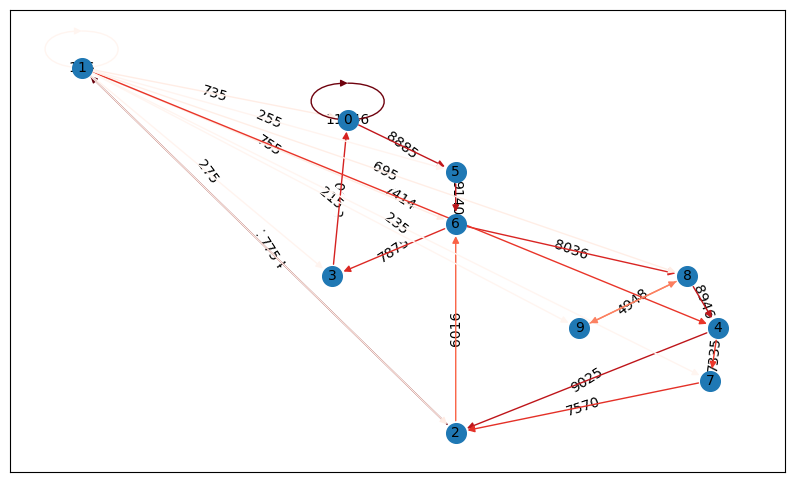

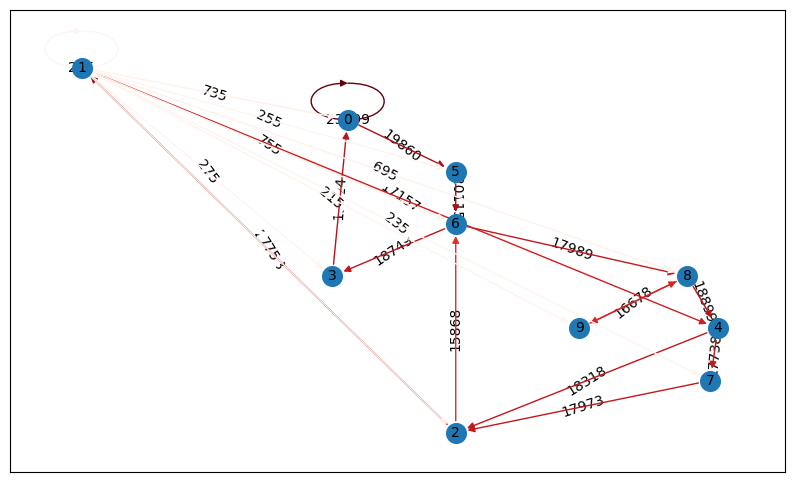

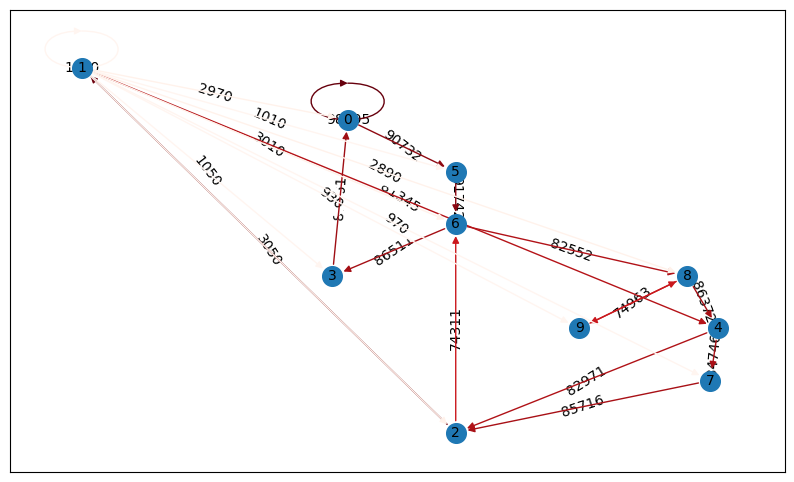

In [7]:
pos = graphviz_layout(NG, prog="dot")
def graphing_paths(a,b):
  GG = nx.MultiDiGraph()
  GG.add_weighted_edges_from(graph_unit_place(a,b))
  elist1 = [(u, v) for (u, v, d) in graph_unit_place(a,b)]
  d1 = [d for (u, v, d) in graph_unit_place(a,b)]
  ed_lab = dict(zip(elist1,d1))
  plt.figure(figsize=(10,6))
  nx.draw_networkx_nodes(GG, pos, node_size=200)
  nx.draw_networkx_labels(GG, pos, font_size=10, font_family="sans-serif")
  nx.draw_networkx_edge_labels(GG, pos, edge_labels = ed_lab)
  nx.draw_networkx_edges(GG, pos, edgelist=elist1,width=1.0,edge_color=d1, edge_cmap=plt.cm.Reds)
  plt.show()


graphing_paths(2,100)
graphing_paths(300,400)
graphing_paths(500,700)
